# Trabajo en clase 1
### Verificando el comportamiento de K Nearest Neighbors KNN

Estudiantes: 

Carlos Adrián Araya Ramírez---------2018319701

Michael Shakime Richards Sparks----2018170667

# 3. Teoria

<h5> 1. Indique cual es costo de “Training” y de test del algoritmo KNN. <h5>

<h6>
Costo de entrenamiento: O(1)

Costo de test: O(N^2)
<h6>

<h5> 2. Explique por qué se dice que instance learning es un algoritmo por fuerza bruta o perezoso.<h5>

<h6>
Se le llama algoritmo peresozo debido a que no existe un modelo que represente al conjunto de entrenamiento, ni existe una fase de aprendizaje y también se le conoce como fuerza bruta porque almacena todos los datos de su entrenamiento y dada una instancia nueva se debe buscar la instancia más similar almacenada en memoria (fuerza bruta) para realizar una predicción.
<h6>

https://idus.us.es/bitstream/handle/11441/24306/O_Tesis-PROV43.pdf?sequence=1&isAllowed=y

<h5> 3. Indique cuantas comparaciones se deben realizar en la etapa de testeo (asumiendo el peor de los casos). <h5> 

<h6>
En el peor de los casos para N feature vectors, se requerirían N comparaciones.
<h6>

<h5> 4. Investigue alguna modificación que se ha realizado al algoritmo original del KNN. <h5>

<h6>
Ponderación de distancia: esta mejora utiliza una regla de votación en la que los distintos miembros del conjunto de vecinos, son ponderados en función de su distancia a la otra instancia a clasificar.
Se han propuesto varios esquemas de este tipo con varias funciones de pesado, la base del primer esquema que se propuso 
es que un vecino de menor distancia debe tener un peso mayor que uno de mayor distancia. La primera de las funciones de ponderación, consistía en un escalado lineal en función de la distancia de cada vecino. Así, el más cercano tendría un valor de 1, el más lejano tendría un valor de 0, y el resto tendría un peso con un valor normalizado de su distancia.

<h6>

https://idus.us.es/bitstream/handle/11441/24306/O_Tesis-PROV43.pdf?sequence=1&isAllowed=y

# 4.  Realizando un clasificador de múltiples clases

## 4.1.

In [2]:
import numpy as np

def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

def cosine_distance(a, b):
    # Calcula la norma Euclidiana de a y de cada fila de b
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b, axis=1)
    
    # Calcula el producto punto entre a y cada fila de b
    dot_ab = np.dot(a, b.T)
    
    # Calcula la cosine similarity entre a y cada fila de b
    cosine_sim = dot_ab / (norm_a * norm_b)
    
    return 1 - cosine_sim

x = np.random.rand(1, 2)[0]
y = np.random.rand(6, 2)
print("x:\n", x)
print("y:\n",y)
a = euclidian_distance(x, y)
b = cosine_distance(x, y)

print("\nEuclidian distance:\n", a)
print("\nCosine distance:\n", b)

x:
 [0.51338253 0.02619748]
y:
 [[0.97666737 0.75621197]
 [0.52125041 0.32905995]
 [0.15080858 0.16766588]
 [0.71896341 0.54466932]
 [0.16602905 0.24923295]
 [0.47802692 0.41800469]]

Euclidian distance:
 [0.86461205 0.30296465 0.38919555 0.55774236 0.41279445 0.39339917]

Cosine distance:
 [0.17913583 0.12829456 0.29423593 0.17316935 0.40389854 0.21464468]


In [3]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform', n_classes = 3):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = n_classes

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))
    
    def cosine_distance(self, a, b):
        # Calcula la norma Euclidiana de a y de cada fila de b
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b, axis=1)
        
        # Calcula el producto punto entre a y cada fila de b
        dot_ab = np.dot(a, b.T)
        
        # Calcula la cosine similarity entre a y cada fila de b
        cosine_sim = dot_ab / (norm_a * norm_b)
        
        # Retorna la distancia entre los angulos la cual esta definida como 1 - cosine_similarity
        return 1 - cosine_sim

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = []
        for x_test in X_test:
            point_dist += [ self.cosine_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            return y_pred

        if self.weights == 'distance':
            # Calcula las distancias y los índices de los k vecinos más cercanos
            distances, neigh_indexes = self.kneighbors(X_test, return_distance=True)

            # Calcula las ponderaciones inversas de las distancias
            inv_distances = 1 / distances

            # Normaliza las ponderaciones inversas por fila para obtener una media ponderada
            # inversa de las distancias de los k vecinos más cercanos
            mean_inv_dist = inv_distances / np.sum(inv_distances, axis=1)[:, np.newaxis]

            # Inicializa una lista vacía para almacenar las probabilidades
            proba = []

            # Itera sobre cada fila de mean_inv_dist
            for i, row in enumerate(mean_inv_dist):

                # Obtiene las etiquetas de clase de los k vecinos más cercanos para esta fila
                row_pred = self.y_train[neigh_indexes[i]]

                # Itera sobre cada clase y calcula la probabilidad de pertenencia a esa clase
                for k in range(self.n_classes):
                    # Encuentra los índices de los vecinos que pertenecen a la clase k
                    indices = np.where(row_pred == k)
                    # Suma las ponderaciones inversas de los vecinos que pertenecen a la clase k
                    prob_ind = np.sum(row[indices])
                    # Añade la probabilidad de pertenencia a la clase k a la lista de probabilidades
                    proba.append(np.array(prob_ind))

            # Convierte la lista de probabilidades en un arreglo y le da forma de matriz
            predict_proba = np.array(proba).reshape(len(X_test), self.n_classes)

            # Asigna la clase con la probabilidad más alta a cada punto de prueba
            y_pred = np.argmax(predict_proba, axis=1)

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test

## Diagrama distancia entre elementos

![Diagrama distancias](diagrama.png)

# Iris dataset (Observations/Treatments)

In [4]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)

X = dataset.data
y = dataset.target


In [5]:
X.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

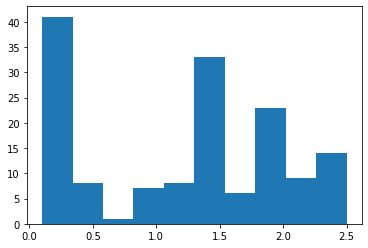

In [7]:
plt.hist(X['petal width (cm)'],10)
plt.show()

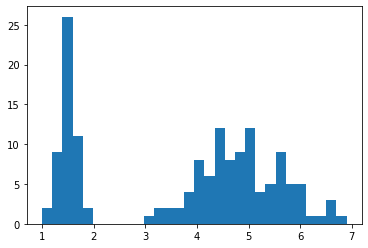

In [8]:

plt.hist(X['petal length (cm)'],30)
plt.show()

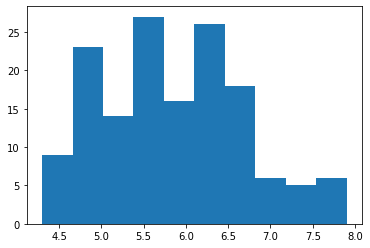

In [9]:

plt.hist(X['sepal length (cm)'],10)
plt.show()

In [10]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

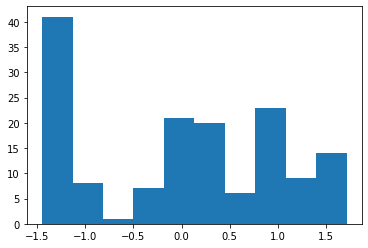

In [11]:
plt.hist(X['petal width (cm)'],10)
plt.show()

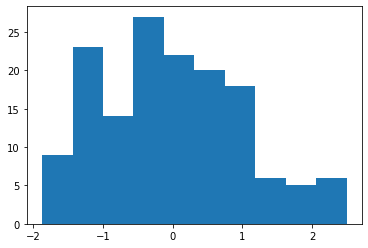

In [12]:
plt.hist(X['sepal length (cm)'],10)
plt.show()

In [13]:
dataset.target_names, dataset.feature_names


(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

## 4.1.2.

In [14]:
import time

if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

k = [2,3,4,5,6,7,9,11]

sk_results = []
sk_time = []

cosine_results = []
cosine_time = []

for i in k:

    start_time = time.time()
    our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=i, weights='distance')
    our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
    end_time = time.time()
    cosine_time.append(end_time - start_time)
    
    start_time = time.time()
    sklearn_classifier = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    sklearn_accuracy = sklearn_classifier.score(X_test, y_test)
    end_time = time.time()
    sk_time.append(end_time - start_time)

    sk_results.append(sklearn_accuracy)
    cosine_results.append(our_accuracy)

data = {'k': k, 'Cosine accuracy': cosine_results, 'Sklearn accuracy': sk_results,'Cosine time': cosine_time,  'Sklearn time': sk_time}

pd.DataFrame(data)


,k,Cosine accuracy,Sklearn accuracy,Cosine time,Sklearn time
0,2,0.866667,0.911111,0.008018,0.011033
1,3,0.800000,0.955556,0.009095,0.005009
2,4,0.866667,0.955556,0.009028,0.006556
3,5,0.800000,0.955556,0.007586,0.007539
4,6,0.866667,0.933333,0.005032,0.007161
5,7,0.844444,0.933333,0.005524,0.003004
6,9,0.844444,0.933333,0.012170,0.005072
7,11,0.866667,0.955556,0.009137,0.005000


### Discusión de los resultados

Se puede observar que el algoritmo k-NN de la biblioteca sklearn logró obtener una mayor precisión en comparación con el método basado en el cálculo de la distancia del coseno para la mayoría de los valores de k considerados. Además, en términos de tiempo, el algoritmo k-NN de la biblioteca sklearn tuvo un mayor tiempo de ejecución en comparación con el método basado en el cálculo de la distancia del coseno para la mayoría de los valores de k considerados.

En resumen, el método basado en el cálculo de la distancia del coseno tuvo tiempos de ejecución más rápidos para algunos valores de k, el algoritmo k-NN de la biblioteca sklearn demostró ser más efectivo en términos de precisión. En general, la elección del método dependerá de las necesidades específicas del proyecto, ya sea la precisión o el tiempo de ejecución es más crítico.

## 4.1.3.

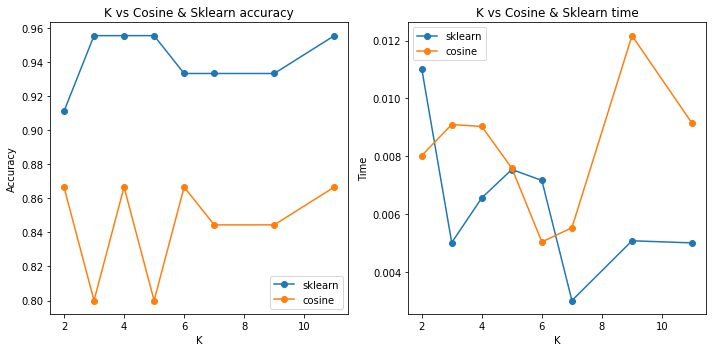

In [15]:
# Crear figura y ejes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Graficar datos en ambas subtramas
ax1.plot(k, sk_results, '-o', label='sklearn')
ax1.plot(k, cosine_results, '-o', label='cosine')
ax2.plot(k, sk_time, '-o', label='sklearn')
ax2.plot(k, cosine_time, '-o', label='cosine')

# Configurar ejes y etiquetas en ambas subtramas
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy')
ax1.set_title('K vs Cosine & Sklearn accuracy')
ax1.legend()
ax2.set_xlabel('K')
ax2.set_ylabel('Time')
ax2.set_title('K vs Cosine & Sklearn time')
ax2.legend()

# Ajustar espaciado entre subtramas
fig.tight_layout()

# Mostrar figura
plt.show()

# 4.2. Clasificador de múltiples clase

## 4.2.1.

In [16]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits(n_class=10, as_frame=True)

## 4.2.2.

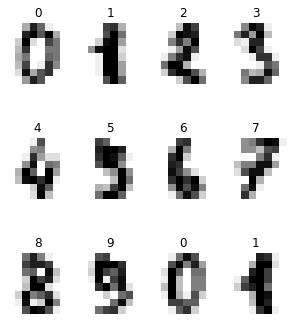

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(5, 6))
plt.gray()

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(digits.target[i])
    ax.axis('off')

plt.show()

## 4.2.3.

In [18]:
dimensiones = digits.data.shape

print("Cantidad de datos:\t", dimensiones[0])
print("Cantidad de features:\t", dimensiones[1])


Cantidad de datos:	 1797
Cantidad de features:	 64


## 4.2.4.

In [19]:
X = digits.data
y = digits.target

if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)



## 4.2.5.

In [20]:
import time

k = [2,3,5,7,8,10,11]

uniform_results = []
uniform_time = []

cosine_results = []
cosine_time = []

for i in k:

    start_time = time.time()
    our_classifier_cosine = KNearestNeighbors(X_train, y_train, n_neighbors=i, weights='distance', n_classes=10)
    our_accuracy_cosine, y_pred, y_test = our_classifier_cosine.score(X_test, y_test)
    end_time = time.time()
    cosine_time.append(end_time - start_time)
    
    start_time = time.time()
    our_classifier_uniform = KNearestNeighbors(X_train, y_train, n_neighbors=i, weights='uniform', n_classes=10)
    our_accuracy_uniform, y_pred, y_test = our_classifier_uniform.score(X_test, y_test)
    end_time = time.time()
    uniform_time.append(end_time - start_time)

    uniform_results.append(our_accuracy_uniform)
    cosine_results.append(our_accuracy_cosine)

data = {'k': k, 'Uniform accuracy (normal)': uniform_results, 'Cosine accuracy (our)': cosine_results, 'Uniform time': uniform_time, 'Cosine time': cosine_time}

pd.DataFrame(data)

,k,Uniform accuracy (normal),Cosine accuracy (our),Uniform time,Cosine time
0,2,0.984444,0.986667,0.627775,0.741149
1,3,0.980000,0.980000,0.482202,0.714187
2,5,0.980000,0.982222,0.447821,0.589875
3,7,0.971111,0.986667,0.466778,0.619639
4,8,0.968889,0.977778,0.497711,0.560035
5,10,0.966667,0.975556,0.395408,0.550872
6,11,0.966667,0.977778,0.397494,0.476423


## 4.2.6.

In [21]:
sk_results = []
sk_time = []

for i in k:
    start_time = time.time()
    sklearn_classifier = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    sklearn_accuracy = sklearn_classifier.score(X_test, y_test)
    end_time = time.time()
    sk_time.append(end_time - start_time)

    sk_results.append(sklearn_accuracy)

data = {'k': k, 'Sklearn accuracy': sk_results, 'Sklearn time': sk_time}

pd.DataFrame(data)

,k,Sklearn accuracy,Sklearn time
0,2,0.982222,0.334913
1,3,0.982222,0.049402
2,5,0.977778,0.050367
3,7,0.968889,0.046942
4,8,0.968889,0.050594
5,10,0.964444,0.049695
6,11,0.966667,0.046783


## 4.2.7.

In [22]:
data = {'k': k, 'Cosine accuracy (our)': cosine_results, 'Sklearn accuracy': sk_results, 'Cosine time': cosine_time, 'Sklearn time': sk_time}
pd.DataFrame(data)

,k,Cosine accuracy (our),Sklearn accuracy,Cosine time,Sklearn time
0,2,0.986667,0.982222,0.741149,0.334913
1,3,0.980000,0.982222,0.714187,0.049402
2,5,0.982222,0.977778,0.589875,0.050367
3,7,0.986667,0.968889,0.619639,0.046942
4,8,0.977778,0.968889,0.560035,0.050594
5,10,0.975556,0.964444,0.550872,0.049695
6,11,0.977778,0.966667,0.476423,0.046783


## 4.2.8.

In [23]:
from PIL import Image
import numpy as np

nums = [0,1,6,7,8,9]
imgs = []

for n in nums:
    img = Image.open(str(n) + '.jpg').convert('L')
    imgs.append([np.array(img).flatten()])


In [24]:
X = digits.data
y = digits.target

if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=3, weights='distance', n_classes=10)

contador = 0

print("Our classifier (distance = cosine_distance):\n")
for img in imgs:
    num_class = our_classifier.predict(img)
    print("\tReal number: ", nums[contador], "\tPrediction: ",num_class)
    contador += 1

contador = 0
print("\nSklearn classifier:\n")
sklearn_classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

for img in imgs:
    num_class = sklearn_classifier.predict(img)
    print("\tReal number: ", nums[contador], "\tPrediction: ",num_class)
    contador += 1

Our classifier (distance = cosine_distance):

	Real number:  0 	Prediction:  [0]
	Real number:  1 	Prediction:  [1]
	Real number:  6 	Prediction:  [6]
	Real number:  7 	Prediction:  [7]
	Real number:  8 	Prediction:  [8]
	Real number:  9 	Prediction:  [9]

Sklearn classifier:

	Real number:  0 	Prediction:  [0]
	Real number:  1 	Prediction:  [1]
	Real number:  6 	Prediction:  [6]
	Real number:  7 	Prediction:  [1]
	Real number:  8 	Prediction:  [8]
	Real number:  9 	Prediction:  [9]


<h5> Se puede notar que nuestra implementación es capaz de predecir el 7 mientras que el clasificador de Sklearn lo predice como un 1, esto puede deberse a que la distancia entre los cosenos es una mejor forma de predecir para este caso específico.
<h5>